# El Tratamiento de las variables categoricas 

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.svm import SVR 

In [46]:
df = pd.read_csv("python-ml-course/datasets/ecom-expense/Ecom Expense.csv")

In [47]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [4]:
dummy_gender = pd.get_dummies(df["Gender"],prefix="Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"],prefix="City")

In [5]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [6]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [7]:
column_names =df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [8]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()

In [9]:
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [10]:
feature_cols = ["Monthly Income","Transaction Time","Gender_Female",
                "Gender_Male","City_Tier 1","City_Tier 2","City_Tier 3","Record"]

In [11]:
X = df_new[feature_cols]
Y = df["Total Spend"]

In [12]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print(lm.intercept_)
print(lm.coef_)

-79.41713030137362
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [14]:
list(zip(feature_cols,lm.coef_))

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.15494612549589545),
 ('Gender_Female', -131.02501325554567),
 ('Gender_Male', 131.0250132555456),
 ('City_Tier 1', 76.76432601049527),
 ('City_Tier 2', 55.138974309232474),
 ('City_Tier 3', -131.9033003197278),
 ('Record', 772.2334457445648)]

In [15]:
lm.score(X,Y)

0.9179923586131016

In [16]:
estimator = SVR(kernel="linear")
selector = RFE(estimator,2,step=1)
selector = selector.fit(X,Y)

In [17]:
selector.support_

array([False, False, False,  True, False, False, False,  True])

In [18]:
lm2 = LinearRegression()
lm2.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
lm2.score(X,Y)

0.9179923586131016

#### El modelo puede ser escrito como:
* $Total_Spend = -79.41713030137362 + Monthly Income*0.14753898049205738 + Transaction Time*0.15494612549589545 + Gender_Female*-131.02501325554567 + Gender_Male*131.0250132555456 + CityTier 1 * 76.76432601049527 +CityTier 2 * 55.138974309232474 + CityTier 3 * -131.9033003197278 + Record * 772.2334457445648$



     * Si es hombre y vive en CT1: Total_Spend = 128.37220896466724 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545+'Record'* 772.2334457445648
    * Si es hombre y vive en CT2: Total_Spend = 106.74685726340445 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 +'Record'* 772.2334457445648
    * Si es hombre y vive en CT3: Total_Spend = -80.29541736555583 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545+'Record'* 772.2334457445648
    * Si es mujer y vive en CT1: Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456+ 76.76432601049527 +'Record'* 772.2334457445648
    * Si es mujer y vive en CT2: Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456+ 55.138974309232474  +'Record'* 772.2334457445648
    * Si es mujer y vive en CT3: Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456-131.9033003197278 +'Record'* 772.2334457445648

In [22]:
-79.41713030137362 + 131.0250132555456 + 76.76432601049527 # sumo los valores que se estan multiplicando por 1 para simplificar

128.37220896466724

In [23]:
df_new["prediction"] = -79.41713030137362 + df_new["Monthly Income"] * 0.14753898049205738 + df_new["Transaction Time"] * 0.15494612549589545 + df_new["Gender_Female"] * (-131.02501325554567) + df_new["Gender_Male"] * 131.0250132555456 + df_new["City_Tier 1"] * 76.76432601049527 +df_new["City_Tier 2"] *  55.138974309232474 + df_new["City_Tier 3"] * (-131.9033003197278) + df_new["Record"] * 772.2334457445648

In [24]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [25]:
SSD = np.sum((df_new["Total Spend"]- df_new["prediction"])**2)
SSD

1517733985.3408163

In [26]:
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))
RSE

803.1318809818165

In [27]:
sales_mean = np.mean(df_new["Total Spend"])
sales_mean

6163.176415976714

In [28]:
error = RSE/sales_mean
error

0.13031135680294162

## Nota:
### Otra forma más simple de calcular las predicciones
Otra posible forma de hacer el cálculo de las predicciones podría ser en usando la función predict del modelo lineal y añadiendolo como columna adicional al data frame:

<code> df_new["prediction"] = lm.predict(pd.DataFrame(df_new[feature_cols]))


## Eliminar variables dummys redundantes 

In [29]:
dummy_gender2 = pd.get_dummies(df["Gender"],prefix="Gender").iloc[:,1:]

In [30]:
dummy_gender2.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [31]:
dummy_city_tier2 = pd.get_dummies(df["City Tier"],prefix="City").iloc[:,1:]
dummy_city_tier2

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0
...,...,...
2357,1,0
2358,1,0
2359,0,1
2360,0,0


In [32]:
column_names =df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender2)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier2)

In [33]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [34]:
feature_cols2 = ["Monthly Income","Transaction Time","Gender_Male","City_Tier 2","City_Tier 3","Record"]
X = df_new[feature_cols2]
Y = df_new["Total Spend"]
lm2 = LinearRegression()
lm2.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
print(lm2.intercept_)

-133.67781754642056


In [36]:
list(zip(feature_cols2,lm2.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549589631),
 ('Gender_Male', 262.05002651109595),
 ('City_Tier 2', -21.62535170126296),
 ('City_Tier 3', -208.66762633022324),
 ('Record', 772.2334457445635)]

In [37]:
lm2.score(X,Y)

0.9179923586131016

Con todas las dummy: 
* [('Monthly Income', 0.14753898049205738),
* ('Transaction Time', 0.15494612549589545),
* ('Gender_Female', -131.02501325554567),
* ('Gender_Male', 131.0250132555456),
* ('City_Tier 1', 76.76432601049527),
* ('City_Tier 2', 55.138974309232474),
* ('City_Tier 3', -131.9033003197278),
* ('Record', 772.2334457445648)]



Cof tras enmascarar las dummy:
* [('Monthly Income', 0.14753898049205744),
* ('Transaction Time', 0.15494612549589631),
* ('Gender_Male', 262.05002651109595),
* ('City_Tier 2', -21.62535170126296),
* ('City_Tier 3', -208.66762633022324),
* ('Record', 772.2334457445635)]

Los cambios se reflejan en:
* Gender_Male: 
    * antes -> 131.02, 
    * después -> 262.05 = ( 131.02 - (-131.02))
* Gender_Female: 
    * antes -> -131.02,
    * después -> 0
* CT1: 
    * antes -> 76.76,
    * después -> 0
* CT2: 
    * antes -> 55.13, 
    * después -> -21.62 = (55.13 - 76.76)
* CT3: 
    * antes -> -131.90, 
    * después -> -208.66 = (-131.90 - 76.76)

## Transformacion de variables para conseguir una relacion no lineal

In [38]:
data_auto = pd.read_csv("python-ml-course/datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [39]:
data_auto.shape

(406, 9)

Text(0.5, 1.0, 'Cv vs MPG')

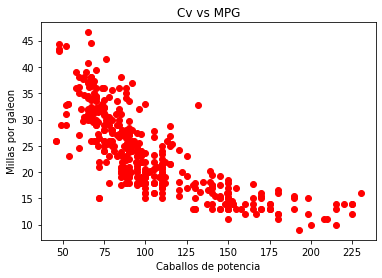

In [40]:
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"],data_auto["mpg"],"ro")
plt.xlabel("Caballos de potencia")
plt.ylabel("Millas por galeon")
plt.title("Cv vs MPG")

## Modelo de regresion lineal
* mpg = $\alpha + \beta * horsepower$

In [41]:
X = data_auto["horsepower"].fillna(np.mean(data_auto["horsepower"]))
Y = data_auto["mpg"].fillna(np.mean(data_auto["mpg"]))
X_data = X[:,np.newaxis]
lm_auto = LinearRegression()
lm_auto.fit(X[:,np.newaxis],Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

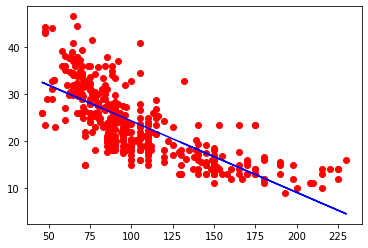

In [42]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X,lm_auto.predict(X[:,np.newaxis]),color = "blue")

In [43]:
lm_auto.score(X_data,Y)

0.574653340645025

In [44]:
SSD = np.sum((Y - lm_auto.predict(X[:,np.newaxis]))**2)
RSE = np.sqrt(SSD/(len(X_data)-2))
y_mean = np.mean(Y) 
error = RSE/y_mean
SSD,RSE,y_mean,error*100
              

(10315.75196006092, 5.053121758388698, 23.51457286432162, 21.48931978286426)

### Modelo de regrecion cuadratico
* $mpg = \alpha + \beta * horsepower^2 $ 

In [49]:
x_data2 = X**2
x_data2 = x_data2[:,np.newaxis]

In [50]:
lm2 = LinearRegression()
lm2.fit(x_data2,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
lm2.score(x_data2,Y)

0.4849887034823205

In [59]:
SSD = np.sum((Y - lm2.predict(x_data2))**2)
RSE = np.sqrt(SSD/(len(x_data2)-2))
y_mean = np.mean(Y) 
error = RSE/y_mean
SSD,RSE,y_mean,error*100

(12490.350340501926, 5.5602795580454965, 23.51457286432162, 23.646100612280488)

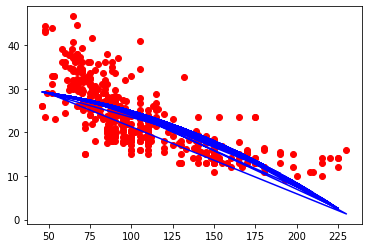

In [62]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X,lm2.predict(x_data2),color = "blue")

### Modelo de regrecion lineal y cuadratico
* $mpg = \alpha + \beta * horsepower + \gamma * horsepower^2 $ 

In [63]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [64]:
poly = PolynomialFeatures(degree=2)

In [67]:
x_data2 = poly.fit_transform(X[:,np.newaxis])

In [68]:
lm3 = linear_model.LinearRegression()
lm3.fit(x_data2,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
lm3.score(x_data2,Y)

0.6439066584257469

In [70]:
lm3.intercept_


55.026192447080355

In [71]:
lm3.coef_

array([ 0.        , -0.43404318,  0.00112615])

modelo que resulta:
mpg = 55.026192447080355 + -0.43404318*hp + 0.00112615*hp

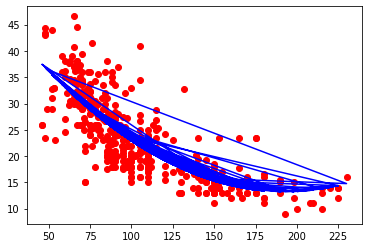

In [73]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X,lm3.predict(x_data2),color = "blue")

Para encontrar un grado para el polinomio mas optimo podemos usar un for 

In [89]:
for d in range(2,6):
    poly2 = PolynomialFeatures(degree=d)
    x_data3 = poly2.fit_transform(X[:,np.newaxis])
    lm4 = linear_model.LinearRegression()
    lm4.fit(x_data3,Y)
    print("Regresion de grado "+str(d))
    print("R2: "+ str(lm4.score(x_data3,Y)))
    print(lm4.intercept_)
    print(lm4.coef_)
    regresion_validation(x_data3,Y,lm4.predict(x_data3))
   

Regresion de grado 2
R2: 0.6439066584257469
55.026192447080355
[ 0.         -0.43404318  0.00112615]
SSD: 8636.180643524502 RSE: 4.623492701540607 y_mean: 23.51457286432162 error: 19.662244039974787
Regresion de grado 3
R2: 0.6444678885560744
58.448774111918084
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD: 8622.56936742855 RSE: 4.6198477771171245 y_mean: 23.51457286432162 error: 19.646743335605148
Regresion de grado 4
R2: 0.6467674189704502
40.096643848138505
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
SSD: 8566.799832491353 RSE: 4.604883286297725 y_mean: 23.51457286432162 error: 19.583104115340575
Regresion de grado 5
R2: 0.6547512489366876
-40.693812896755176
[ 0.00000000e+00  4.00021432e+00 -7.54801920e-02  6.19621369e-04
 -2.36220932e-06  3.41982935e-09]
SSD: 8373.171393636556 RSE: 4.552545635842338 y_mean: 23.51457286432162 error: 19.360528733013307


In [87]:
def regresion_validation(x_data,Y,y_pred):
    SSD = np.sum((Y - y_pred)**2)
    RSE = np.sqrt(SSD/(len(x_data)-2))
    y_mean = np.mean(Y) 
    error = RSE/y_mean
    print("SSD: " + str(SSD),"RSE: " + str(RSE),"y_mean: "+str(y_mean),"error: "+ str(error*100))

## El problema de los outliers

son los datos que se salen del estandar

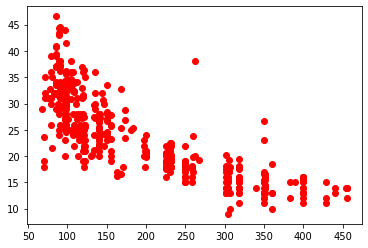

In [93]:
plt.plot(data_auto["displacement"],data_auto["mpg"],"ro")

In [96]:
a = data_auto["displacement"].fillna(np.mean(data_auto["displacement"]))
a = a[:,np.newaxis]
b = data_auto["mpg"].fillna(np.mean(data_auto["mpg"]))
b = b[:,np.newaxis]
lm_out = LinearRegression()
lm_out.fit(a,b)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
lm_out.score(a,b)

0.6261049762826918

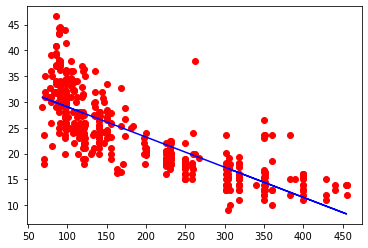

In [98]:
%matplotlib inline
plt.plot(a,b,"ro")
plt.plot(a,lm_out.predict(a),color = "blue")

In [99]:
data_auto[(data_auto["displacement"]>250) & (data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [101]:
data_auto[(data_auto["displacement"]>300) & (data_auto["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [102]:
data_auto_clean = data_auto.drop([395,258,305,372])

In [104]:
z = data_auto_clean["displacement"].fillna(np.mean(data_auto_clean["displacement"]))
z = z[:,np.newaxis]
w = data_auto_clean["mpg"].fillna(np.mean(data_auto_clean["mpg"]))

lm_out2 = LinearRegression()
lm_out2.fit(z,w)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
lm_out2.score(z,w)

0.6466514317531822

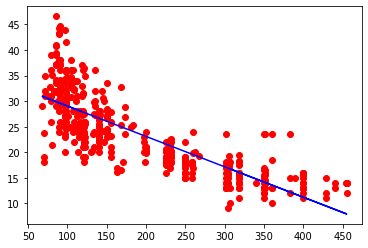

In [106]:
%matplotlib inline
plt.plot(z,w,"ro")
plt.plot(z,lm_out2.predict(z),color = "blue")